# Biostat 257 Homework 1

#### Due Apr 16 @ 11:59PM

## Q1

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

1. If you don't have a GitHub account, apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

2. Create a **private** repository `biostat-257-2021-spring` and add `Hua-Zhou` and `Chris-German` (TA) as your collaborators.

3. Top directories of the repository should be `hw1`, `hw2`, ... You may create other branches for developing your homework solutions; but the `main` branch will be your presentation area. Put your homework submission files (Jupyter notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in the `main` branch. 

4. After each homework due date, teaching assistant and instructor will check out your `main` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

5. Read the [style guide](https://github.com/johnmyleswhite/Style.jl) for Julia programming. Following rules in the style guide will be strictly enforced when grading: (4) four space indenting rule, (6) 80 character rule, (7) space after comma rule, (8) no space before comma rule, (9) space around operator rule.

## Q2

Let's check whether floating-point numbers obey certain algebraic rules. For 2-5, one counter-example suffices.

1. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

In [1]:
x = 0.1
y = 0.1
z = 1.0

@show (x + y) + z == x + (y + z)
@show bitstring((x + y) + z)
@show bitstring(x + (y + z));

(x + y) + z == x + (y + z) = false
bitstring((x + y) + z) = "0011111111110011001100110011001100110011001100110011001100110011"
bitstring(x + (y + z)) = "0011111111110011001100110011001100110011001100110011001100110100"


The association rule does not work using `Float64` due to the lack of an infinite precision. To conserve precision, we could instead utilize `BigFloat` or compute arithmetics in `Rational`. 

In [2]:
@show (big"0.1" + big"0.1") + big"1.0" == big"0.1" + (big"0.1" + big"1.0")
@show (1//10 + 1//10) + 1 == 1//10 + (1//10 + 1);

(big"0.1" + big"0.1") + big"1.0" == big"0.1" + (big"0.1" + big"1.0") = true
(1 // 10 + 1 // 10) + 1 == 1 // 10 + (1 // 10 + 1) = true


2. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

In [3]:
x = 0.003
y = 0.1
z = 1000.0
@show (x * y) * z == x * (y * z)
@show bitstring((x * y) * z)
@show bitstring(x * (y * z));

(x * y) * z == x * (y * z) = false
bitstring((x * y) * z) = "0011111111010011001100110011001100110011001100110011001100110100"
bitstring(x * (y * z)) = "0011111111010011001100110011001100110011001100110011001100110011"


3. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

In [4]:
a = 0.1
x = 0.003
y = 1000.0
@show a * (x + y) == a * x + a * y
@show bitstring(a * (x + y))
@show bitstring(a * x + a * y);

a * (x + y) == a * x + a * y = false
bitstring(a * (x + y)) = "0100000001011001000000000000010011101010010010101000110000010110"
bitstring(a * x + a * y) = "0100000001011001000000000000010011101010010010101000110000010101"


4. Is `0 * x == 0` true for all floating-point number `x`? 

In [5]:
0 * Inf == 0

false

5. Is `x / a == x * (1 / a)` always true?

In [6]:
x = 3.0
a = 10.0

@show x / a == x * (1 / a)
@show bitstring(x / a)
@show bitstring(x * (1 / a));

x / a == x * (1 / a) = false
bitstring(x / a) = "0011111111010011001100110011001100110011001100110011001100110011"
bitstring(x * (1 / a)) = "0011111111010011001100110011001100110011001100110011001100110100"


## Q3

Consider Julia function
```julia
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
```
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input.   

In [7]:
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end

@code_llvm g(5)

;  @ In[7]:1 within `g'
define i64 @julia_g_1229(i64 signext %0) {
top:
;  @ In[7]:3 within `g'
; ┌ @ int.jl:88 within `*'
   %1 = mul i64 %0, 9765625
; └
; ┌ @ int.jl:86 within `-'
   %2 = add i64 %1, -2441406
; └
;  @ In[7]:5 within `g'
  ret i64 %2
}


2. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  

In [8]:
@code_llvm g(5.0)

;  @ In[7]:1 within `g'
define double @julia_g_1257(double %0) {
top:
;  @ In[7]:3 within `g'
; ┌ @ promotion.jl:322 within `*' @ float.jl:332
   %1 = fmul double %0, 5.000000e+00
; └
; ┌ @ promotion.jl:323 within `-' @ float.jl:329
   %2 = fadd double %1, -1.000000e+00
; └
; ┌ @ promotion.jl:322 within `*' @ float.jl:332
   %3 = fmul double %2, 5.000000e+00
; └
; ┌ @ promotion.jl:323 within `-' @ float.jl:329
   %4 = fadd double %3, -1.000000e+00
; └
; ┌ @ promotion.jl:322 within `*' @ float.jl:332
   %5 = fmul double %4, 5.000000e+00
; └
; ┌ @ promotion.jl:323 within `-' @ float.jl:329
   %6 = fadd double %5, -1.000000e+00
; └
; ┌ @ promotion.jl:322 within `*' @ float.jl:332
   %7 = fmul double %6, 5.000000e+00
; └
; ┌ @ promotion.jl:323 within `-' @ float.jl:329
   %8 = fadd double %7, -1.000000e+00
; └
; ┌ @ promotion.jl:322 within `*' @ float.jl:332
   %9 = fmul double %8, 5.000000e+00
; └
; ┌ @ promotion.jl:323 within `-' @ float.jl:329
   %10 = fadd double %9, -1.000000e+00
; └


3. Compare the bitcode from questions 1 and 2. What do you find?  

`g(5.0)` needs more steps than `g(5)` due to floating-point arithmetics, where the usual associative and distributive laws are not obeyed.

4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end
```
    Explain what does macro `@fastmath` do?

In [9]:
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end

@code_llvm g_fastmath(5)

;  @ In[9]:1 within `g_fastmath'
define i64 @julia_g_fastmath_1260(i64 signext %0) {
top:
;  @ In[9]:3 within `g_fastmath'
; ┌ @ fastmath.jl:270 within `mul_fast'
; │┌ @ int.jl:88 within `*'
    %1 = mul i64 %0, 9765625
; └└
; ┌ @ fastmath.jl:270 within `sub_fast'
; │┌ @ int.jl:86 within `-'
    %2 = add i64 %1, -2441406
; └└
;  @ In[9]:5 within `g_fastmath'
  ret i64 %2
}


In [10]:
@code_llvm g_fastmath(5.0)

;  @ In[9]:1 within `g_fastmath'
define double @julia_g_fastmath_1262(double %0) {
top:
;  @ In[9]:3 within `g_fastmath'
; ┌ @ fastmath.jl:267 within `mul_fast' @ fastmath.jl:167
   %1 = fmul fast double %0, 0x4162A05F20000000
; └
; ┌ @ fastmath.jl:267 within `sub_fast' @ fastmath.jl:166
   %2 = fadd fast double %1, 0xC142A05F00000000
; └
;  @ In[9]:5 within `g_fastmath'
  ret double %2
}


`@fastmath` allows [execution of a transformed version of the expression](https://docs.julialang.org/en/v1.0.0/base/math/#Base.FastMath.@fastmath), which calls functions that may violate strict IEEE semantics, while allowing the fastest possible operation. In this case, the floating-point number arithmetic is computed in a similar manner to the integer arithmetic, ignoring the associative and distributive laws.

## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.   

1. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1` at points `x`.

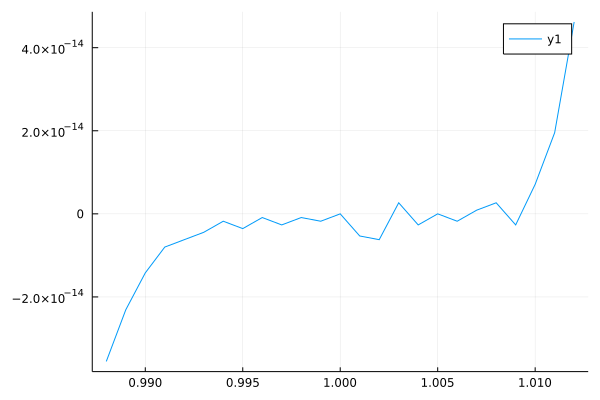

In [11]:
using Plots
x = 0.988:0.001:1.012
y = x.^7 - 7x.^6 + 21x.^5 - 35x.^4 + 35x.^3 - 21x.^2 + 7x .- 1
plot(x, y)

2. Plot the polynomial `y = (x - 1)^7` at points `x`.  

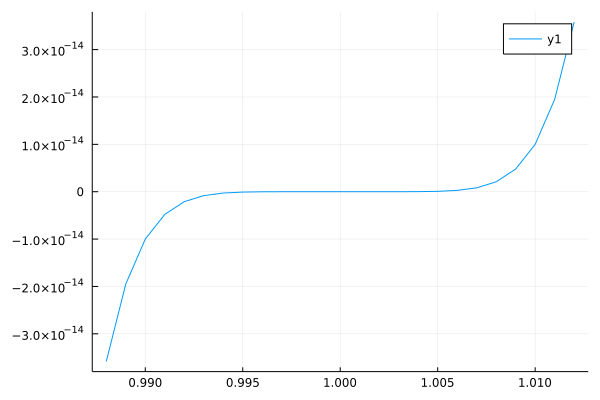

In [12]:
y = (x .- 1).^7
plot(x, y)

3. Explain what you found.

Although the equivalent results should be obtained, the first operation requires many more computations for `Float64`, which results in numerical instability due to finite precision, particularly catastrophic cancellation.  

## Q5

1. Show the **Sherman-Morrison formula**
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

Given the uniqueness of matrix inverse, it suffices to show that the matrix multiplication leads to $\mathbf{I}_{n}$:

$$
(\mathbf{A} + \mathbf{u} \mathbf{u}^T)(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{I}_{n} + \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1} - \frac{\mathbf{u} \mathbf{u}^T \mathbf{A}^{-1} + \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1}}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \\
= \mathbf{I}_{n} + \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1} - \frac{\mathbf{u} \left( 1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u} \right) \mathbf{u}^T \mathbf{A}^{-1}}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \\
= \mathbf{I}_{n} + \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1} - \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1} = \mathbf{I}_{n}
$$

2. Show the **Woodbury formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

$$
(\mathbf{A} + \mathbf{U} \mathbf{V}^T)(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{I}_{n} + \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} \\
= \mathbf{I}_{n} + \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} [(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1}] \mathbf{V}^T \mathbf{A}^{-1} \\
= \mathbf{I}_{n} + \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}) (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} \\
= \mathbf{I}_{n} + \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} \mathbf{V}^T \mathbf{A}^{-1} = \mathbf{I}_{n}
$$

3. Show the **binomial inversion formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

$$
(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{I}_{n} + \mathbf{U} \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} \\
= \mathbf{I}_{n} + \mathbf{U} \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} [(\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} + \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1}] \mathbf{V}^T \mathbf{A}^{-1} \\
= \mathbf{I}_{n} + \mathbf{U} \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} \mathbf{B} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}) (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1} \\
= \mathbf{I}_{n} + \mathbf{U} \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} - \mathbf{U} \mathbf{B} \mathbf{V}^T \mathbf{A}^{-1} = \mathbf{I}_{n}
$$

4. Show the identity
$$
\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Hint**: 1 and 2 are special cases of 3.

$$
\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_n + \mathbf{A}^{-1} \mathbf{U} \mathbf{V}^T) \\
\begin{bmatrix}
\mathbf{I}_n &
\mathbf{0}_{n \times m} \\
\mathbf{V}^T &
\mathbf{I}_m
\end{bmatrix}
\begin{bmatrix}
\mathbf{I}_n + \mathbf{A}^{-1} \mathbf{U} \mathbf{V}^T &
\mathbf{A}^{-1} \mathbf{U} \\
\mathbf{0}_{m \times n} &
\mathbf{I}_m
\end{bmatrix}
\begin{bmatrix}
\mathbf{I}_n &
\mathbf{0}_{n \times m} \\
-\mathbf{V}^T &
\mathbf{I}_m
\end{bmatrix} = 
\begin{bmatrix}
\mathbf{I}_n &
\mathbf{A}^{-1} \mathbf{U}  \\
\mathbf{0}_{m \times m} &
\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}
\end{bmatrix} \\
\therefore \text{det}(\mathbf{I}_n + \mathbf{A}^{-1} \mathbf{U} \mathbf{V}^T) = 
\text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}), \\
\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})
$$

## Q6

Demonstrate the following facts about triangular matrices in Julia (one example for each fact). Mathematically curious ones are also encouraged to prove them. 

Note a unit triangular matrix is a triangular matrix with all diagonal entries being 1.

1. The product of two upper (lower) triangular matrices is upper (lower) triangular.

In [13]:
using Random
Random.seed!(1234)

x = zeros(5, 5)
y = zeros(5, 5)
for i in 1:size(x, 1), j in 1:size(x, 2)
    if i >= j
        x[i, j] = rand()
        y[i, j] = rand()
    end
end

In [14]:
x * y

5×5 Matrix{Float64}:
 0.453058  0.0       0.0         0.0        0.0
 0.799509  0.678214  0.0         0.0        0.0
 0.46114   0.586974  0.00707663  0.0        0.0
 0.485083  0.718742  0.0399221   0.0477334  0.0
 1.62294   1.39543   0.0749327   0.119925   0.0478248

2. The inverse of an upper (lower) triangular matrix is upper (lower) triangular.

In [15]:
inv(x)

5×5 Matrix{Float64}:
   1.69249      0.0        0.0        0.0     0.0
  -1.20695      1.25941    0.0        0.0     0.0
  -0.0640628   -0.479083   1.54111    0.0     0.0
  12.1073     -12.0441    -7.5099    17.6546  0.0
 -12.2          2.66799   -4.34615  -13.0596  7.82412

3. The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

In [16]:
x = zeros(5, 5)
y = zeros(5, 5)
for i in 1:size(x, 1), j in 1:size(x, 2)
    if i > j
        x[i, j] = rand()
        y[i, j] = rand()
    elseif i == j
        x[i, j] = 1
        y[i, j] = 1
    end
end

In [17]:
x * y

5×5 Matrix{Float64}:
 1.0       0.0       0.0       0.0       0.0
 1.37005   1.0       0.0       0.0       0.0
 0.278892  0.542211  1.0       0.0       0.0
 1.22877   1.34725   0.744644  1.0       0.0
 0.953971  0.950556  0.713532  0.904484  1.0

4. The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

In [18]:
inv(x)

5×5 Matrix{Float64}:
  1.0        0.0         0.0         0.0       0.0
 -0.931115   1.0         0.0         0.0       0.0
 -0.203991  -0.0460428   1.0         0.0       0.0
 -0.304318  -0.447051   -0.0462887   1.0       0.0
  0.135089  -0.184757   -0.128585   -0.404953  1.0

5. An orthogonal upper (lower) triangular matrix is diagonal.

Suppose $\mathbf{A}$ is an orthogonal lower triangular matrix such that $\mathbf{A} = [a_1, a_2, ..., a_n]$ and $a_i^T \cdot a_j$ = 0 for $i \neq j$. Then the last row except $a_{n,n}$ is zero, since $a_i^T \cdot a_n$ = 0 for $i \neq n$. Using similar logic, all entries below the diagnoal are zero, so $\mathbf{A}$ is diagonal.